Finding the relationship between rental prices and population density in the 10 cities with Idealista and various websites illustrated below (wiki (population) and statoids (area))

In [26]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_smooth, ggtitle
import seaborn as sns
from plotnine import *


In [2]:
# Extracting population for required province from Wikipedia

url = 'https://en.wikipedia.org/wiki/List_of_metropolitan_areas_in_Spain#cite_note-ruiz-con-7'

# make a GET request
res = requests.get(url) # replace 'URL' with the URL of the webpage

# parse the content of the request with BeautifulSoup
soup = BeautifulSoup(res.content, 'html.parser')

# find all 'tr' tags in the HTML
table_rows = soup.find_all('tr')

# create a list to hold the data
data = []

# iterate over each 'tr' tag
for tr in table_rows:
    # find all 'td' or 'th' tags in the 'tr' tag
    td = tr.find_all(['td', 'th'])
    # get the text from each 'td' or 'th' tag
    # and add it to the row_data list
    row_data = [i.text for i in td]
    # add the row_data to the data list
    data.append(row_data)

# create a DataFrame from the data, using the first row as headers
df = pd.DataFrame(data[1:], columns=data[0])
display(df)

df = df.replace('\n','', regex=True)
df = df.replace('\[.*?\]','', regex=True)
df = df.replace('\(.*?\)','', regex=True)


# print the DataFrame
display(df)


,Metropolitan area (2018)\n,ESPON\n,Urban Audit\n,Ruiz\n
0,Madrid\n,"6,155,116\n","6,204,829[8]\n","7,038,056[7]\n"
1,Barcelona\n,"5,179,243\n","5,233,638[9]\n","5,142,490[7]\n"
2,Valencia(–Sagunto)\n,"1,645,342\n","1,564,145[10]\n","2,300,000[7]\n"
3,Seville\n,"1,305,342\n","1,249,346[11]\n","1,360,361[7]\n"
4,Bilbao\n,"987,000\n","989,994[12]\n","953,152\n"
5,Málaga\n,"944,000\n","1,218,245[13]\n","923,104\n"
6,Oviedo–Gijón–Avilés\n,"844,000\n","617,300 (295,640[14] + 321,660[15])\n","863,050[7]\n"
7,Alicante–Elche(–Elda)\n,"793,000\n","429,060[16]\n","785,020[7]\n"
8,Las Palmas\n,"640,000\n","625,892[17]\n","741,826[7]\n"
9,Zaragoza\n,"639,000\n","685,873[18]\n","715,894\n"


,Metropolitan area (2018)\n,ESPON\n,Urban Audit\n,Ruiz\n
0,Madrid,"6,155,116","6,204,829","7,038,056"
1,Barcelona,"5,179,243","5,233,638","5,142,490"
2,Valencia,"1,645,342","1,564,145","2,300,000"
3,Seville,"1,305,342","1,249,346","1,360,361"
4,Bilbao,"987,000","989,994","953,152"
5,Málaga,"944,000","1,218,245","923,104"
6,Oviedo–Gijón–Avilés,"844,000","617,300","863,050"
7,Alicante–Elche,"793,000","429,060","785,020"
8,Las Palmas,"640,000","625,892","741,826"
9,Zaragoza,"639,000","685,873","715,894"


In [3]:
# Clean df to only include columns wanted
columns_to_drop = ['ESPON\n', 'Urban Audit\n', ]
df.drop(columns_to_drop, axis=1, inplace=True)
df.rename(columns={'Metropolitan area (2018)\n': 'province'}, inplace=True)
df

,province,Ruiz\n
0,Madrid,"7,038,056"
1,Barcelona,"5,142,490"
2,Valencia,"2,300,000"
3,Seville,"1,360,361"
4,Bilbao,"953,152"
5,Málaga,"923,104"
6,Oviedo–Gijón–Avilés,"863,050"
7,Alicante–Elche,"785,020"
8,Las Palmas,"741,826"
9,Zaragoza,"715,894"


In [4]:
# Import csv file from Idealista

idealista = pd.read_csv('~/Desktop/DS105L/Project/rental-output.csv')
idealista


,price,propertyType,operation,size,rooms,bathrooms,province,municipality,district,country,distance,newDevelopment,hasLift,priceByArea,newDevelopmentFinished
0,1200.0,flat,rent,130.0,3,2,Barcelona,Cerdanyola del Vallès,Fontetes,es,11988.0,False,True,9.0,NaN
1,1390.0,flat,rent,90.0,2,2,Barcelona,Sant Cugat del Vallès,Can Matas,es,13943.0,False,True,15.0,NaN
2,3000.0,chalet,rent,323.0,4,4,Barcelona,Sant Cugat del Vallès,Valldoreix,es,12487.0,False,True,9.0,NaN
3,4200.0,chalet,rent,507.0,5,5,Barcelona,Sant Cugat del Vallès,Golf,es,11093.0,False,True,8.0,NaN
4,9000.0,chalet,rent,957.0,5,6,Barcelona,Cerdanyola del Vallès,Bellaterra,es,14194.0,False,True,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,750.0,flat,rent,65.0,1,1,Las Palmas,Las Palmas de Gran Canaria,Puerto - Canteras,es,3375.0,False,False,12.0,NaN
4517,850.0,flat,rent,65.0,3,1,Las Palmas,Las Palmas de Gran Canaria,Centro,es,1145.0,False,True,13.0,NaN
4518,1400.0,flat,rent,130.0,3,2,Las Palmas,Las Palmas de Gran Canaria,Vegueta - Triana,es,2598.0,False,False,11.0,NaN
4519,650.0,penthouse,rent,30.0,0,1,Las Palmas,Las Palmas de Gran Canaria,Puerto - Canteras,es,3258.0,False,False,22.0,NaN


In [5]:
# Group the rows by city and calculate the mean price
summary_price = idealista.groupby('province')['priceByArea'].median().reset_index()
summary_price

,province,priceByArea
0,Balears (Illes),16.5
1,Barcelona,20.0
2,Granada,9.0
3,Las Palmas,12.0
4,Madrid,18.0
5,Málaga,13.0
6,Sevilla,11.0
7,València,12.0
8,Vizcaya,13.0
9,Zaragoza,9.0


In [6]:
# Combine the two dataframes (population data are missing due to variations in province and cities names)
combine = pd.merge(summary_price, df, on='province')
combine.rename(columns={'Ruiz\n': 'population'}, inplace=True)
combine

,province,priceByArea,population
0,Barcelona,20.0,"5,142,490"
1,Granada,9.0,"498,365"
2,Las Palmas,12.0,"741,826"
3,Madrid,18.0,"7,038,056"
4,Málaga,13.0,"923,104"
5,Zaragoza,9.0,"715,894"


In [7]:
# Add rows that doesnt align
new_rows = [
    # Selilla has different names in df so add manually
    {'province': 'Sevilla', 'priceByArea': 11.0, 'population': 1360361},
    # Valencia has different names in df so add manually
    {'province': 'València', 'priceByArea': 12.0, 'population': 2300000},
    # Balears (Illes) poplation is searched seperately
    {'province': 'Balears (Illes)', 'priceByArea': 16.5, 'population': 1115999},
    # Vizcaya poplation is searched seperately
    {'province': 'Vizcaya', 'priceByArea': 13.0, 'population': 1149628}
]
    
combine = pd.concat([combine, pd.DataFrame(new_rows)])
combine


,province,priceByArea,population
0,Barcelona,20.0,"5,142,490"
1,Granada,9.0,"498,365"
2,Las Palmas,12.0,"741,826"
3,Madrid,18.0,"7,038,056"
4,Málaga,13.0,"923,104"
5,Zaragoza,9.0,"715,894"
0,Sevilla,11.0,1360361
1,València,12.0,2300000
2,Balears (Illes),16.5,1115999
3,Vizcaya,13.0,1149628


In [8]:
# Reset index
combine = combine.reset_index(drop=True)
combine

,province,priceByArea,population
0,Barcelona,20.0,"5,142,490"
1,Granada,9.0,"498,365"
2,Las Palmas,12.0,"741,826"
3,Madrid,18.0,"7,038,056"
4,Málaga,13.0,"923,104"
5,Zaragoza,9.0,"715,894"
6,Sevilla,11.0,1360361
7,València,12.0,2300000
8,Balears (Illes),16.5,1115999
9,Vizcaya,13.0,1149628


In [9]:
# Getting areas data for Spanish provinces to find out population density

# Send a GET request to the URL
url = 'http://www.statoids.com/yes.html'
response = requests.get(url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table element
table = soup.find('table')

# Initialize empty lists for 'province' and 'area'
provinces = []
areas = []

# Find all table rows (tr) except the first one (header row)
rows = table.find_all('tr')[1:]

# Loop through each row
for row in rows:
    # Find all cells (td) within the row
    cells = row.find_all('td')
    
    # Check if the row contains the expected number of cells
    if len(cells) >= 2:
        # Extract 'province' from the first cell (td)
        province = cells[0].text.strip()
        provinces.append(province)
        
        # Extract 'area' from the second cell (td) with class="n"
        area_cell = row.select('td.n')[1]
        if area_cell:
            # Extract the numeric value from the cell text
            area_text = area_cell.text.strip()
            area = area_text.replace(',', '')
            areas.append(area)
        else:
            areas.append('')

# Create a DataFrame with 'province' and 'area'
df_area = pd.DataFrame({'province': provinces, 'area': areas})

print(df_area)


                  province    area
0                 A Coruña    7876
1                    Álava    3047
2                 Albacete   14858
3                 Alicante    5863
4                  Almería    8774
5                 Asturias   10565
6                    Ávila    8048
7                  Badajoz   21657
8                 Baleares    5014
9                Barcelona    7733
10                  Burgos   14269
11                 Cáceres   19945
12                   Cádiz    7385
13               Cantabria    5289
14               Castellón    6679
15                   Ceuta      18
16             Ciudad Real   19749
17                 Córdoba   13718
18                  Cuenca   17061
19                  Girona    5886
20                 Granada   12531
21             Guadalajara   12190
22               Guipúzcoa    1997
23                  Huelva   10085
24                  Huesca   15671
25                    Jaén   13498
26                La Rioja    5034
27              Las 

In [10]:
# Merge all data found
combine_all = pd.merge(combine, df_area, on='province')
combine_all

,province,priceByArea,population,area
0,Barcelona,20.0,"5,142,490",7733
1,Granada,9.0,"498,365",12531
2,Las Palmas,12.0,"741,826",4065
3,Madrid,18.0,"7,038,056",7995
4,Málaga,13.0,"923,104",7276
5,Zaragoza,9.0,"715,894",17194
6,Sevilla,11.0,1360361,14001
7,Vizcaya,13.0,1149628,2217


In [11]:
# Add back missing values by searching missing areas up seperately
new_rows2 = [
    # Balears (Illes) is searched online
    {'province': 'Balears (Illes)', 'priceByArea': 16.5, 'population': 1115999 , 'area': 4992},
    # Valencia has different names in df so add manually
    {'province': 'València', 'priceByArea': 12.0, 'population': 2300000 , 'area': 10763},
]
    
combine_all = pd.concat([combine_all, pd.DataFrame(new_rows2)])

combine_all

,province,priceByArea,population,area
0,Barcelona,20.0,"5,142,490",7733
1,Granada,9.0,"498,365",12531
2,Las Palmas,12.0,"741,826",4065
3,Madrid,18.0,"7,038,056",7995
4,Málaga,13.0,"923,104",7276
5,Zaragoza,9.0,"715,894",17194
6,Sevilla,11.0,1360361,14001
7,Vizcaya,13.0,1149628,2217
0,Balears (Illes),16.5,1115999,4992
1,València,12.0,2300000,10763


In [16]:
# Reset index
combine_all = combine_all.reset_index(drop=True)
combine_all

,province,priceByArea,population,area
0,Barcelona,20.0,5142490,7733
1,Granada,9.0,498365,12531
2,Las Palmas,12.0,741826,4065
3,Madrid,18.0,7038056,7995
4,Málaga,13.0,923104,7276
5,Zaragoza,9.0,715894,17194
6,Sevilla,11.0,1360361,14001
7,Vizcaya,13.0,1149628,2217
8,Balears (Illes),16.5,1115999,4992
9,València,12.0,2300000,10763


In [17]:
# Display the data types of columns
column_types = combine_all.dtypes
print(column_types)

province        object
priceByArea    float64
population      object
area            object
dtype: object


In [18]:
# Remove commas in population column so 
combine_all['population'] = combine_all['population'].apply(lambda x: x.replace(',', '') if isinstance(x, str) and ',' in x else x)
combine_all

,province,priceByArea,population,area
0,Barcelona,20.0,5142490,7733
1,Granada,9.0,498365,12531
2,Las Palmas,12.0,741826,4065
3,Madrid,18.0,7038056,7995
4,Málaga,13.0,923104,7276
5,Zaragoza,9.0,715894,17194
6,Sevilla,11.0,1360361,14001
7,Vizcaya,13.0,1149628,2217
8,Balears (Illes),16.5,1115999,4992
9,València,12.0,2300000,10763


In [19]:
# Convert the column from string to float
combine_all['population'] = combine_all['population'].astype(float)
combine_all['area'] = combine_all['area'].astype(float)
combine_all


,province,priceByArea,population,area
0,Barcelona,20.0,5142490.0,7733.0
1,Granada,9.0,498365.0,12531.0
2,Las Palmas,12.0,741826.0,4065.0
3,Madrid,18.0,7038056.0,7995.0
4,Málaga,13.0,923104.0,7276.0
5,Zaragoza,9.0,715894.0,17194.0
6,Sevilla,11.0,1360361.0,14001.0
7,Vizcaya,13.0,1149628.0,2217.0
8,Balears (Illes),16.5,1115999.0,4992.0
9,València,12.0,2300000.0,10763.0


In [20]:
# Finding population density for the 10 cities
combine_all['population density (population/km2)'] = combine_all['population'] / combine_all['area']
combine_all

,province,priceByArea,population,area,population density (population/km2)
0,Barcelona,20.0,5142490.0,7733.0,665.005819
1,Granada,9.0,498365.0,12531.0,39.770569
2,Las Palmas,12.0,741826.0,4065.0,182.491021
3,Madrid,18.0,7038056.0,7995.0,880.307192
4,Málaga,13.0,923104.0,7276.0,126.869709
5,Zaragoza,9.0,715894.0,17194.0,41.636268
6,Sevilla,11.0,1360361.0,14001.0,97.161703
7,Vizcaya,13.0,1149628.0,2217.0,518.551195
8,Balears (Illes),16.5,1115999.0,4992.0,223.557492
9,València,12.0,2300000.0,10763.0,213.695066


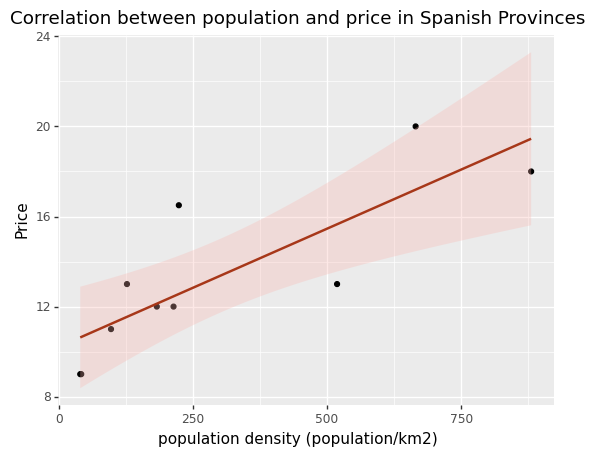

In [27]:
# Creating a correlation graph of price and population density

# Create the scatter plot with a line of best fit
scatter_plot = (ggplot(data=combine_all) +
                aes(x='population density (population/km2)', y='priceByArea') +
                geom_point() +
                geom_smooth(method='lm', color='#A73719', fill='#FBB4AE', alpha=0.3) +
                labs(y='Price') +
                ggtitle('Correlation between population and price in Spanish Provinces'))

print(scatter_plot)
